### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data

In [2]:
df = pd.read_csv('china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


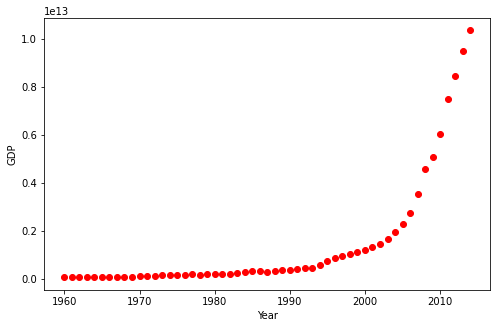

In [3]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Lookin at the above plot we can assume that the logistic function can be a good approximation model.

### Building the Model

In [4]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x - Beta_2)))
    return y

#### Normalizing x and y

In [5]:
xdata = x_data / max(x_data)
ydata = y_data / max(y_data)

#### Finding best parameters for our fit line

In [6]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

print('beta_1 = %f, beta_2 = %f' % (popt[0], popt[1]))

beta_1 = 690.451712, beta_2 = 0.997207


#### Plotting

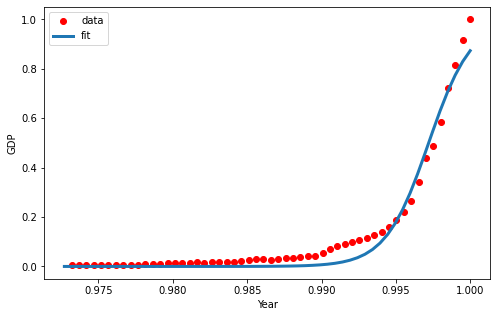

In [7]:
x = np.linspace(1960, 2015, 55)
x = x / max(x)
plt.figure(figsize=(8, 5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

#### Calculating Accuracy

In [8]:
from sklearn.metrics import r2_score

msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

popt, pcov = curve_fit(sigmoid, train_x, train_y)

y_hat = sigmoid(test_x, *popt)

print('Mean absolute error: %.2f' % np.mean(np.absolute(y_hat - test_y)))
print('Resual sum of squares (MSE): %.2f' % np.mean((y_hat - test_y) ** 2))
print('R2-score: %.2f' % r2_score(test_y, y_hat))

Mean absolute error: 0.03
Resual sum of squares (MSE): 0.00
R2-score: 0.87
